# Used Phones & Tablets Pricing Dataset
<center>
<img src="https://i.imgur.com/M29eSKC.gif" width="500" height="400" />
</center>

## Introduction

Used phones and tablets have become increasingly popular in both the global and Indian markets in recent years. The rise of e-commerce platforms, improved quality of refurbished devices, and the increasing affordability of technology have all contributed to this trend.

Around the world, consumers are realizing the many benefits of purchasing used devices. Not only do these devices offer a more affordable alternative to brand-new gadgets, but they also have a smaller environmental impact. Many consumers are also attracted to the idea of reducing waste by giving new life to a previously-owned device.

In addition to being more affordable, used phones and tablets in India often come with a warranty, providing peace of mind to consumers who may be worried about purchasing a previously-owned device. This, combined with the improved quality of refurbished devices, has made used phones and tablets a popular choice for many consumers in India.

In addition, companies that collect and refurbish used devices can also collect valuable data and insights about consumer behavior and preferences, which can inform their future product development and marketing efforts. Overall, the collection and reselling of used phones and tablets can be a profitable and socially responsible business model for companies.

## Problem Statement

As a data scientist working at a company specializing in the collection and resale of used phones and tablets, the goal is to build a regression model to predict the used price of these devices. This information is crucial for the company to effectively price their devices and maximize their profits.

The dataset contains information about the used phone prices and tablets, including the model, OS, battery, screen size, storage capacity, and other relevant features. The task is to perform exploratory data analysis (EDA) on the dataset to understand the underlying relationships and patterns in the data, and then build a regression model to predict the used price of the devices.

The final model should be highly accurate and able to generalize well to unseen data. This project will provide valuable insights into the used phone and tablet market and enable the company to make informed pricing decisions.

## Ways to approach

• **What is the problem you're trying to solve?** 
    The goal is to build a regression model to predict the used price of these devices.

• **What data do you have available?** Data containing the information about the used phone prices and tablets, including the model, OS, battery, screen size, storage capacity, and other relevant features.

• **What are the potential solution(s) you can implement?** Analyzing the features to find out the pattern and relationhip with the target 
variables that could help in getting better evaluation results

• **What performance metrics will you use to evaluate your solution?** Using MSE and R2 score to evaluate the regression model

• **What techniques will you use?**

        * Data processing
        * EDA
        * Feature Engineering
        * Scaling and Normalization
        * Model Selection and Evaluation
        * Test the model
        
• **How will you validate your solution?** Model which provides low MSE and high R2 score close to 1 would be validation point to select the best model



In [284]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory


# Data Processing

In [285]:
df = pd.read_csv('used_device_data.csv')

In [286]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


### Variables
* **device_brand**: Name of manufacturing brand
* **os**: OS on which the device runs
* **screen_size**: Size of the screen in cm
* **4g**: Whether 4G is available or not
* **5g**: Whether 5G is available or not
* **front_camera_mp**: Resolution of the rear camera in megapixels
* **back_camera_mp**: Resolution of the front camera in megapixels
* **internal_memory**: Amount of internal memory (ROM) in GB
* **ram**: Amount of RAM in GB
* **battery**: Energy capacity of the device battery in mAh
* **weight**: Weight of the device in grams
* **release_year**: Year when the device model was released
* **days_used**: Number of days the used/refurbished device has been used
* **normalized_new_price**: Normalized price of a new device of the same model
* **normalized_used_price** (TARGET): Normalized price of the used/refurbished device

In [287]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [288]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [289]:
df.dtypes

device_brand              object
os                        object
screen_size              float64
4g                        object
5g                        object
rear_camera_mp           float64
front_camera_mp          float64
internal_memory          float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

In [290]:
df.shape

(3454, 15)

In [291]:
duplicated_rows= df[df.duplicated()]
duplicated_rows.shape

(0, 15)

Good thing, that there is no duplicated rows.

In [292]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

We could see some null values in dataset. Removing those won't be a correct option as we have less rows. We'll treat it. But first we'll check whether we have outliers in the following columns

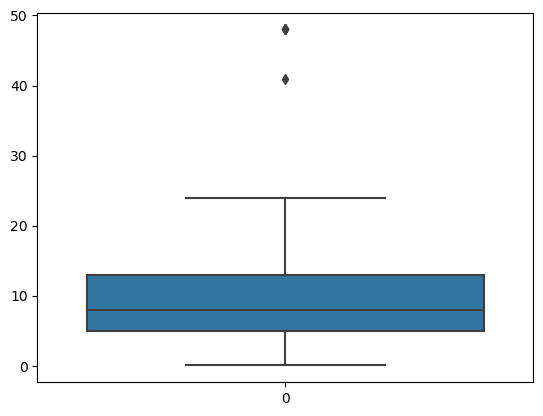

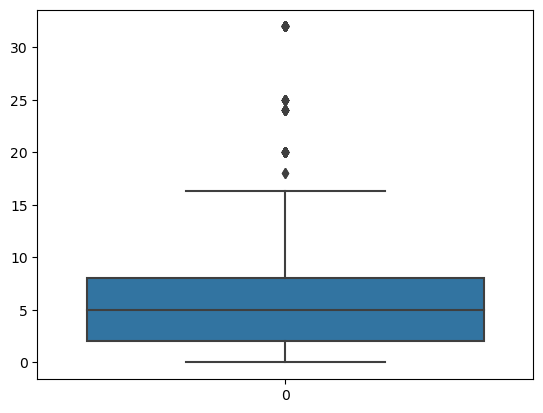

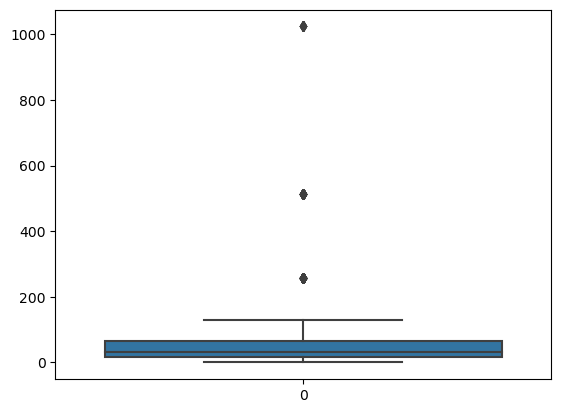

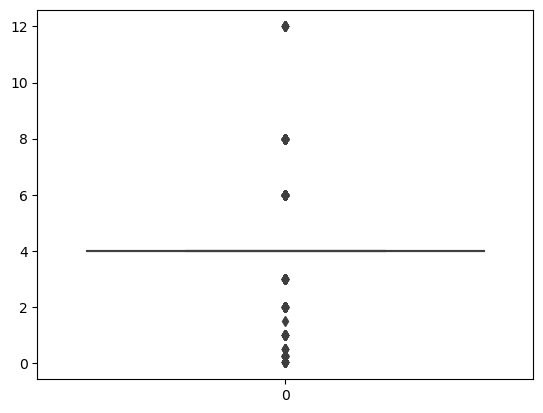

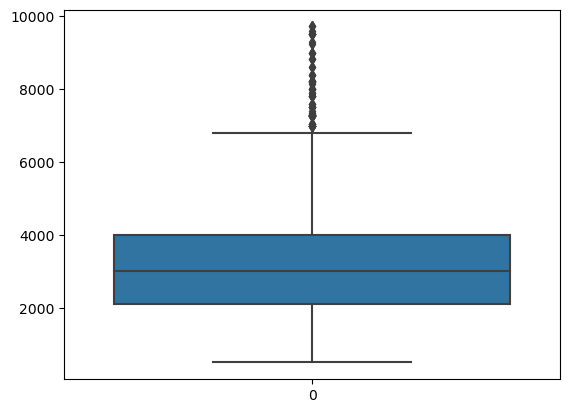

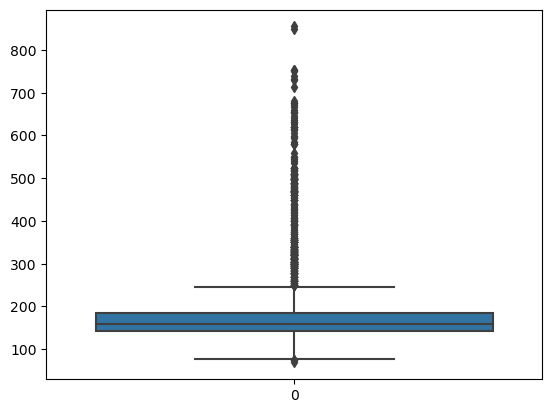

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt 

features=['rear_camera_mp','front_camera_mp','internal_memory','ram','battery','weight']

for i in features:
    sns.boxplot(df[i])
    plt.show()
    




We could see that there is outliers in the data. When we have outliers, it is good to replace the null values with median values as median values are not affected by outliers.

In [294]:
for i in features:
    a=df[i].median()
    print(i,' median value : ', a)
    df[i]= df[i].fillna(a)

rear_camera_mp  median value :  8.0
front_camera_mp  median value :  5.0
internal_memory  median value :  32.0
ram  median value :  4.0
battery  median value :  3000.0
weight  median value :  160.0


In [295]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

Great! Now we have treated the null values. Now let's explore the columns

# Exploratory Data Analysis

## Univariate Analysis

In [296]:
num_features=[feature for feature in df.columns if df[feature].dtype != 'O']
num_features

['screen_size',
 'rear_camera_mp',
 'front_camera_mp',
 'internal_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [297]:
cat_features=[feature for feature in df.columns if df[feature].dtype == 'O']
cat_features

['device_brand', 'os', '4g', '5g']

First lets see the distribution of features using histogram

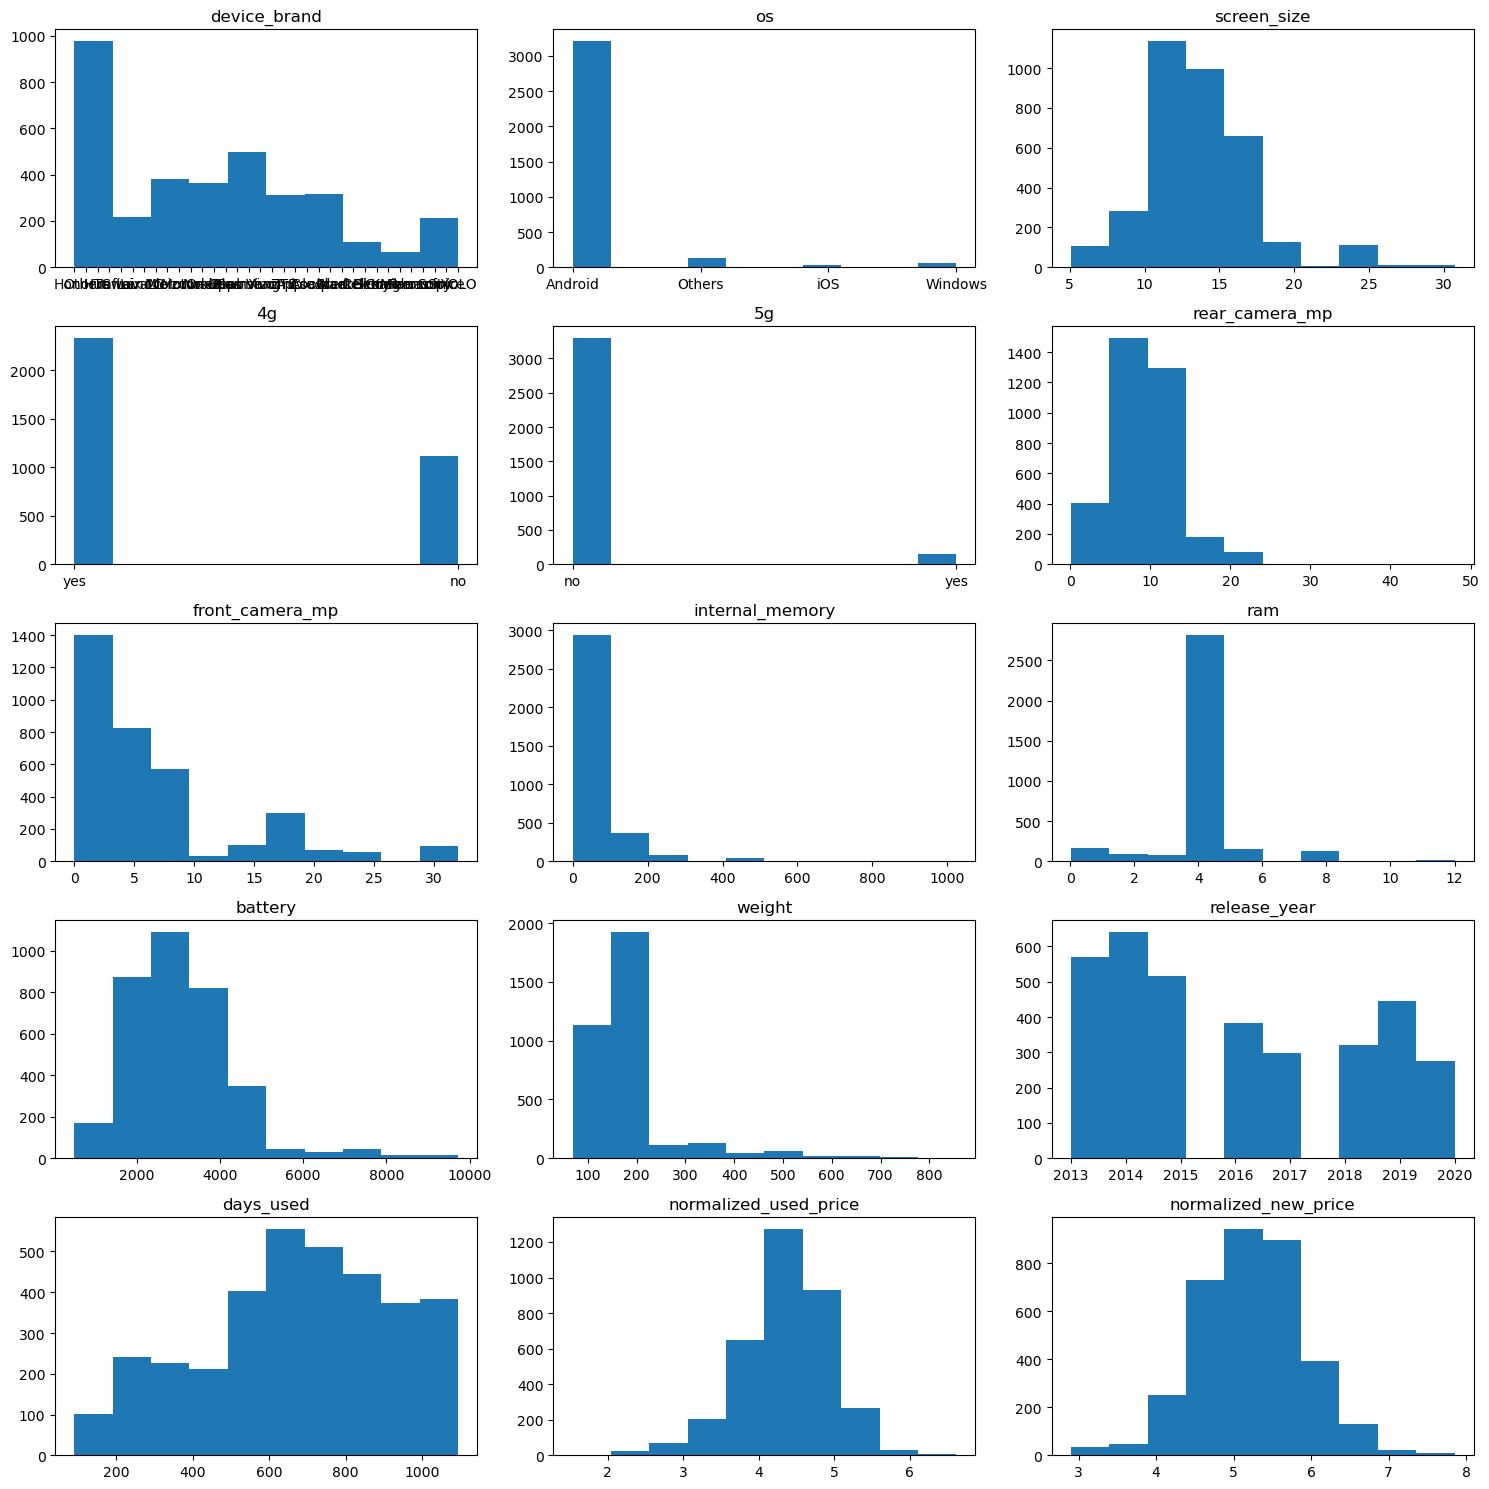

In [298]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    # Plot a histogram of the feature in the current subplot
    axs[i].hist(df[feature])
    axs[i].set_title(feature)


# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()






(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Samsung'),
  Text(2, 0, 'Huawei'),
  Text(3, 0, 'LG'),
  Text(4, 0, 'Lenovo'),
  Text(5, 0, 'ZTE'),
  Text(6, 0, 'Xiaomi'),
  Text(7, 0, 'Oppo'),
  Text(8, 0, 'Asus'),
  Text(9, 0, 'Alcatel'),
  Text(10, 0, 'Micromax'),
  Text(11, 0, 'Vivo'),
  Text(12, 0, 'Honor'),
  Text(13, 0, 'HTC'),
  Text(14, 0, 'Nokia'),
  Text(15, 0, 'Motorola'),
  Text(16, 0, 'Sony'),
  Text(17, 0, 'Meizu'),
  Text(18, 0, 'Gionee'),
  Text(19, 0, 'Acer'),
  Text(20, 0, 'XOLO'),
  Text(21, 0, 'Panasonic'),
  Text(22, 0, 'Realme'),
  Text(23, 0, 'Apple'),
  Text(24, 0, 'Lava'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Spice'),
  Text(27, 0, 'Karbonn'),
  Text(28, 0, 'Coolpad'),
  Text(29, 0, 'BlackBerry'),
  Text(30, 0, 'Microsoft'),
  Text(31, 0, 'OnePlus'),
  Text(32, 0, 'Google'),
  Text(33, 0, 'Infinix')])

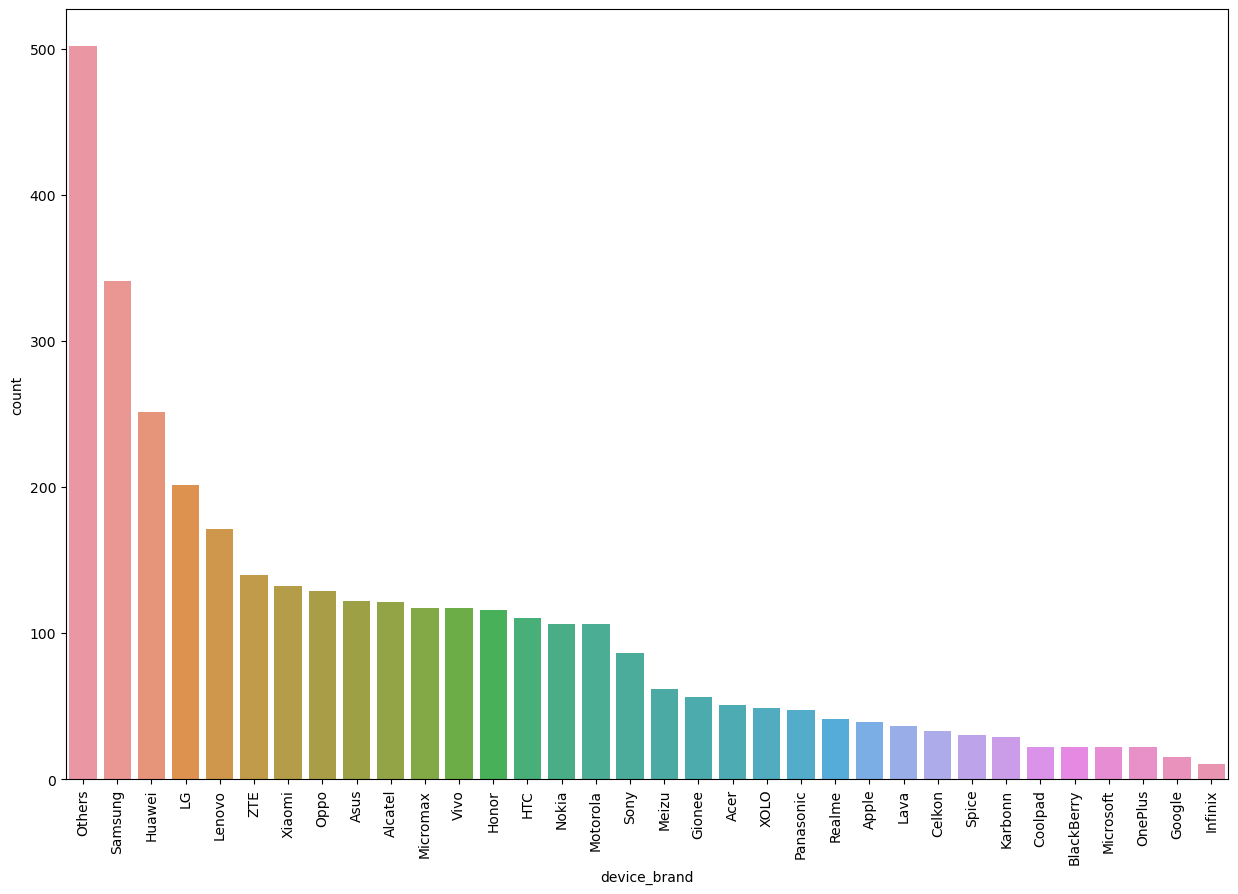

In [299]:
fig= plt.figure(figsize=(15,10))
sns.countplot(x=df.device_brand,order=df["device_brand"].value_counts().index)
plt.xticks(rotation=90)

* **Samsung** was the most reused phone next to phone brands which are categorized as **Others**. 
* There are more people using **Android** OS
* Screen size is mostly between **10-15**
* **4g and 5g** users are more
* Rear camera mp range is mostly between **5-15** mega pixels
* Front camera mp range is mostly between **0-10** mega pixels
* Internal memory is mostly between **0-100**
* Phones ram storage is mostly between **3-5** GB
* Battery life is mostly around **3000** mah
* Weight is around **150-210**
* Most of the phones were released between **2013-2015**
* People have used the phones on an average between **600-800** days which is approximately 2-2.5 years
* Average normalized used price was between **4.2-5** k
* Average normalized new price was between **5-6** k

### Numerical features

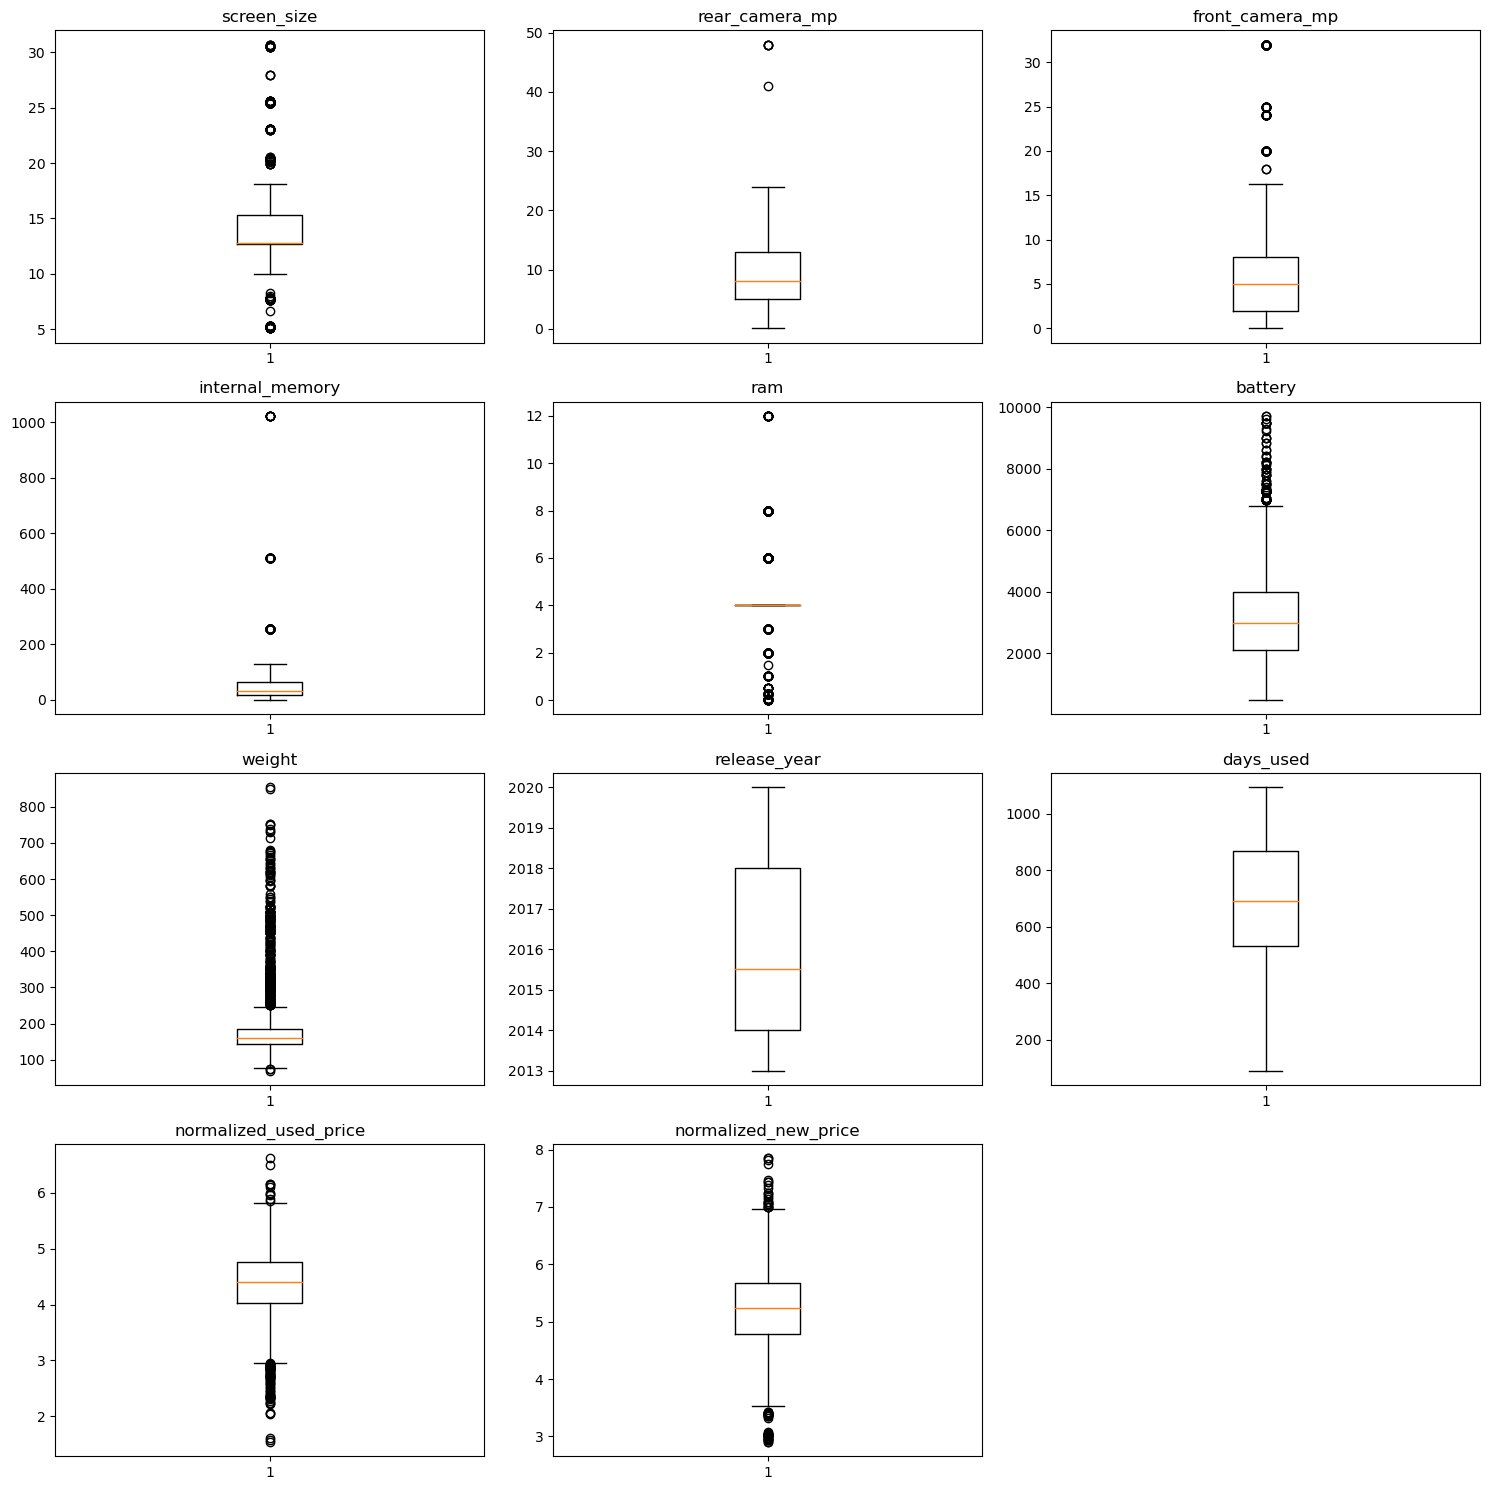

In [300]:
fig,axs= plt.subplots(4,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(num_features):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

We could see the outliers in the above features. We'll correct it in the upcoming sections

### Categorical features

We have seen the univariate analysis of categorical variables in the histplot already.

## Detecting and treating outliers

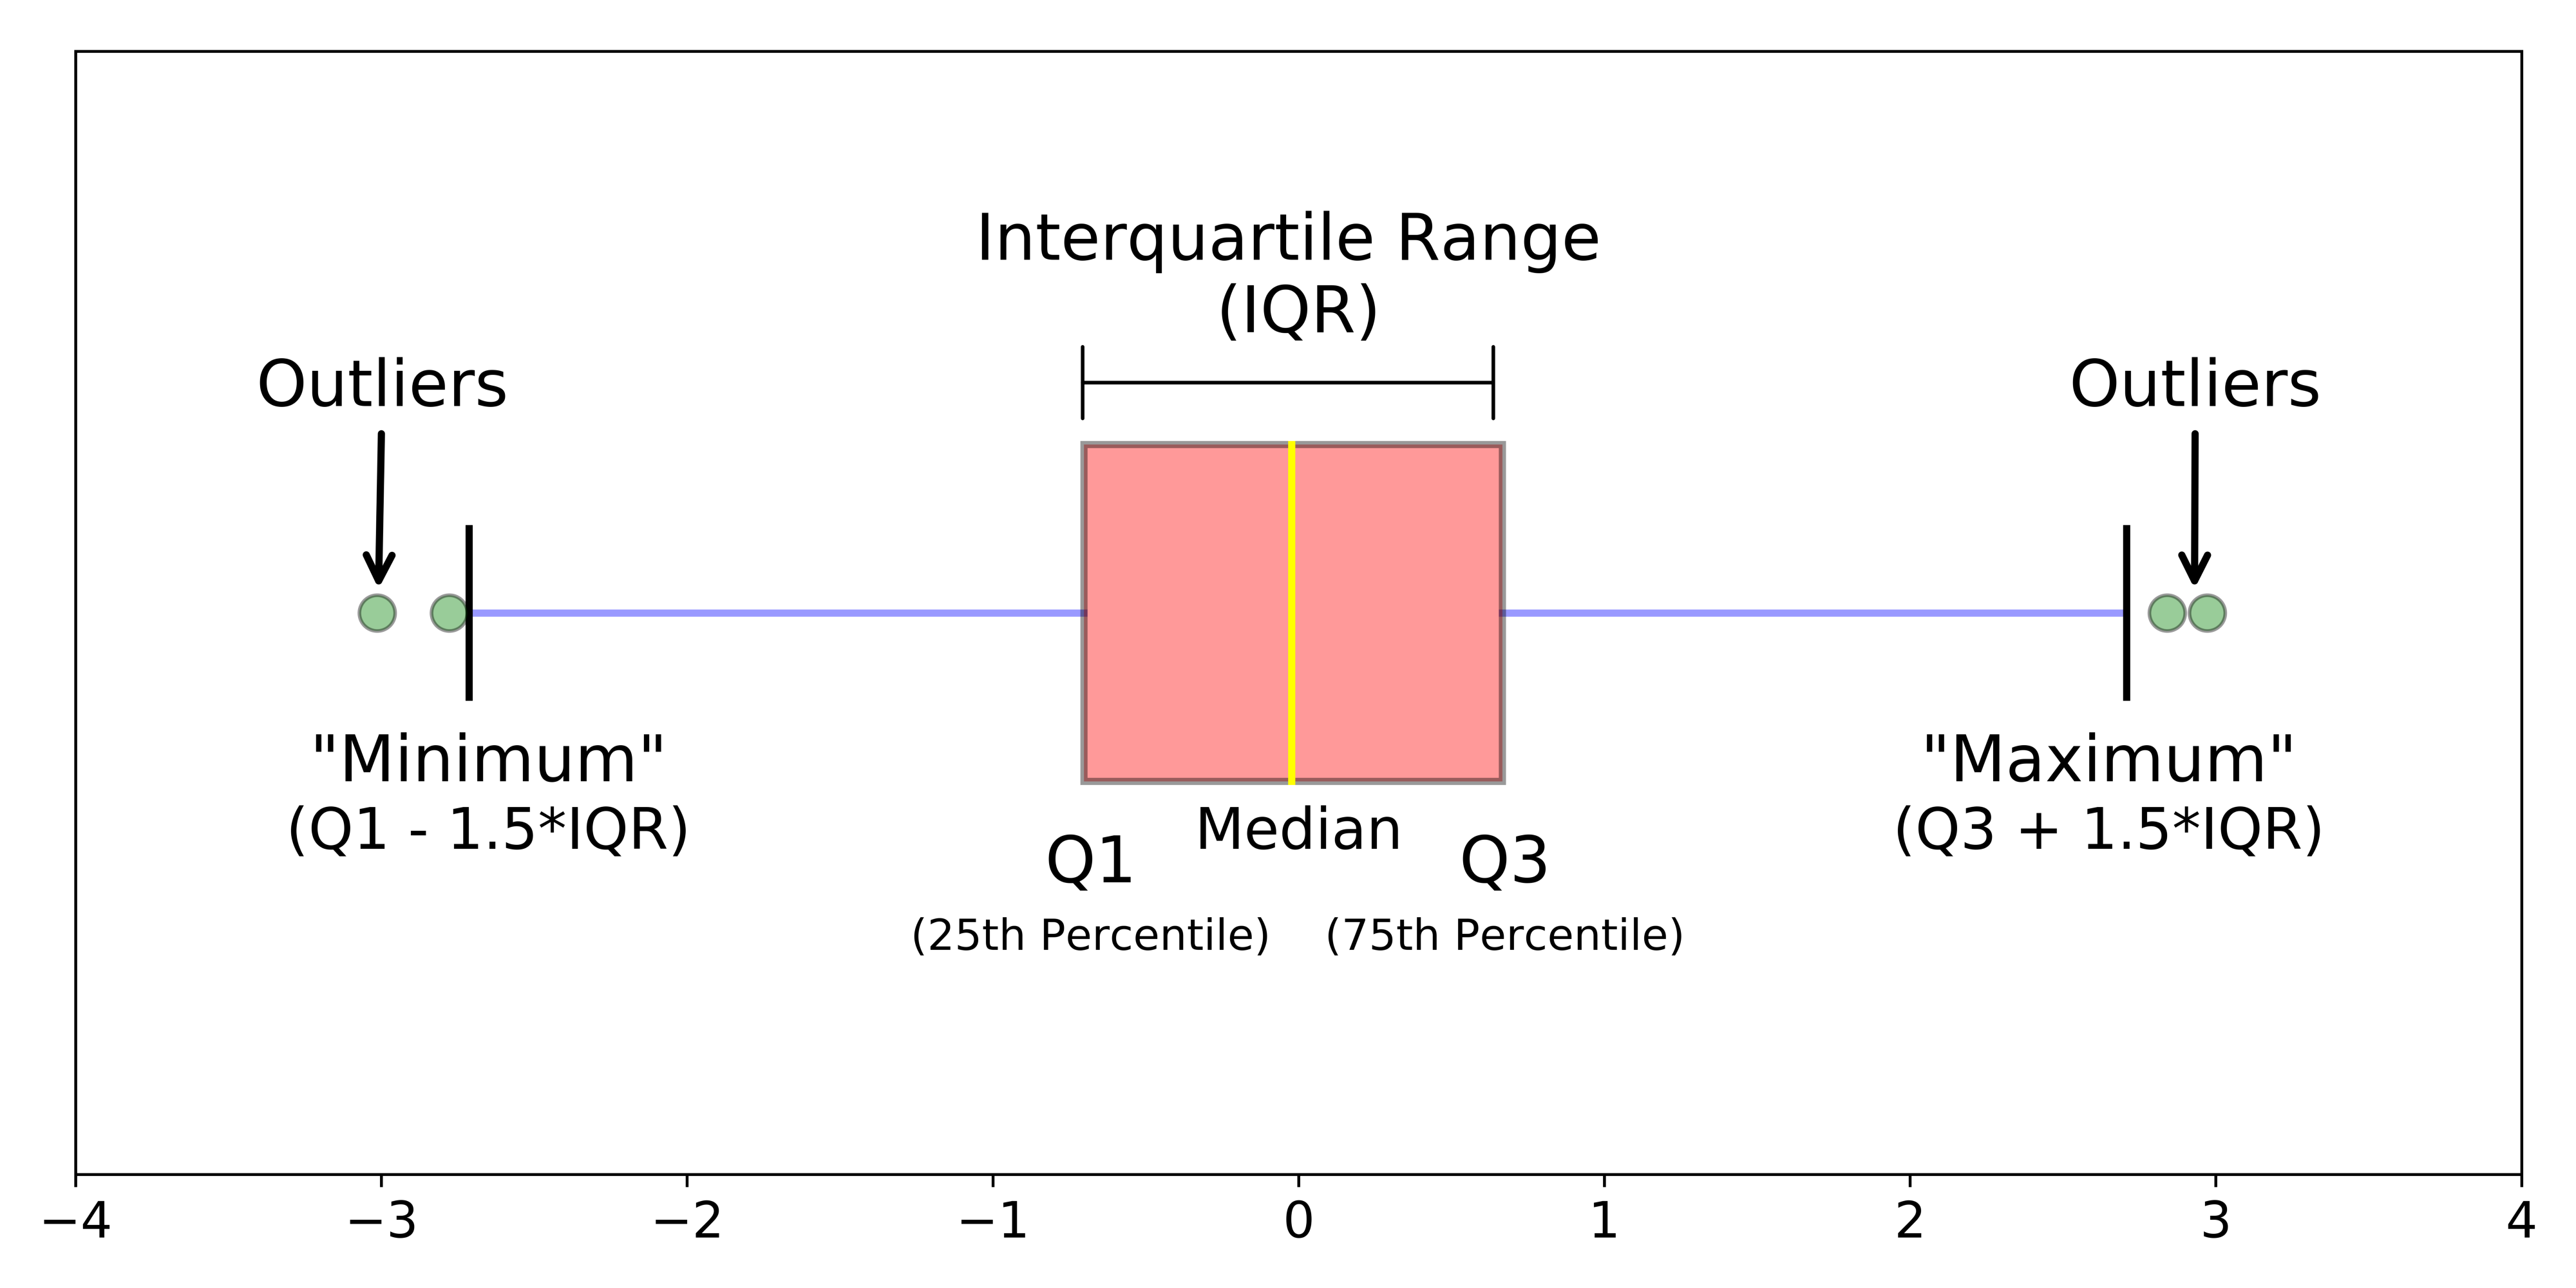

In [301]:
features=['screen_size',
 'front_camera_mp',
 'ram',
 'battery',
 'weight',
 'normalized_used_price',
 'normalized_new_price']
for i in features:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')
    

Feature:  screen_size
Skewness value:  0.24196057812708158


Feature:  front_camera_mp
Skewness value:  0.8742550451761658


Feature:  ram
Skewness value:  0


Feature:  battery
Skewness value:  0.16546880955819707


Feature:  weight
Skewness value:  1.1632954167338405


Feature:  normalized_used_price
Skewness value:  -0.14433266108803783


Feature:  normalized_new_price
Skewness value:  -0.02125569017206945




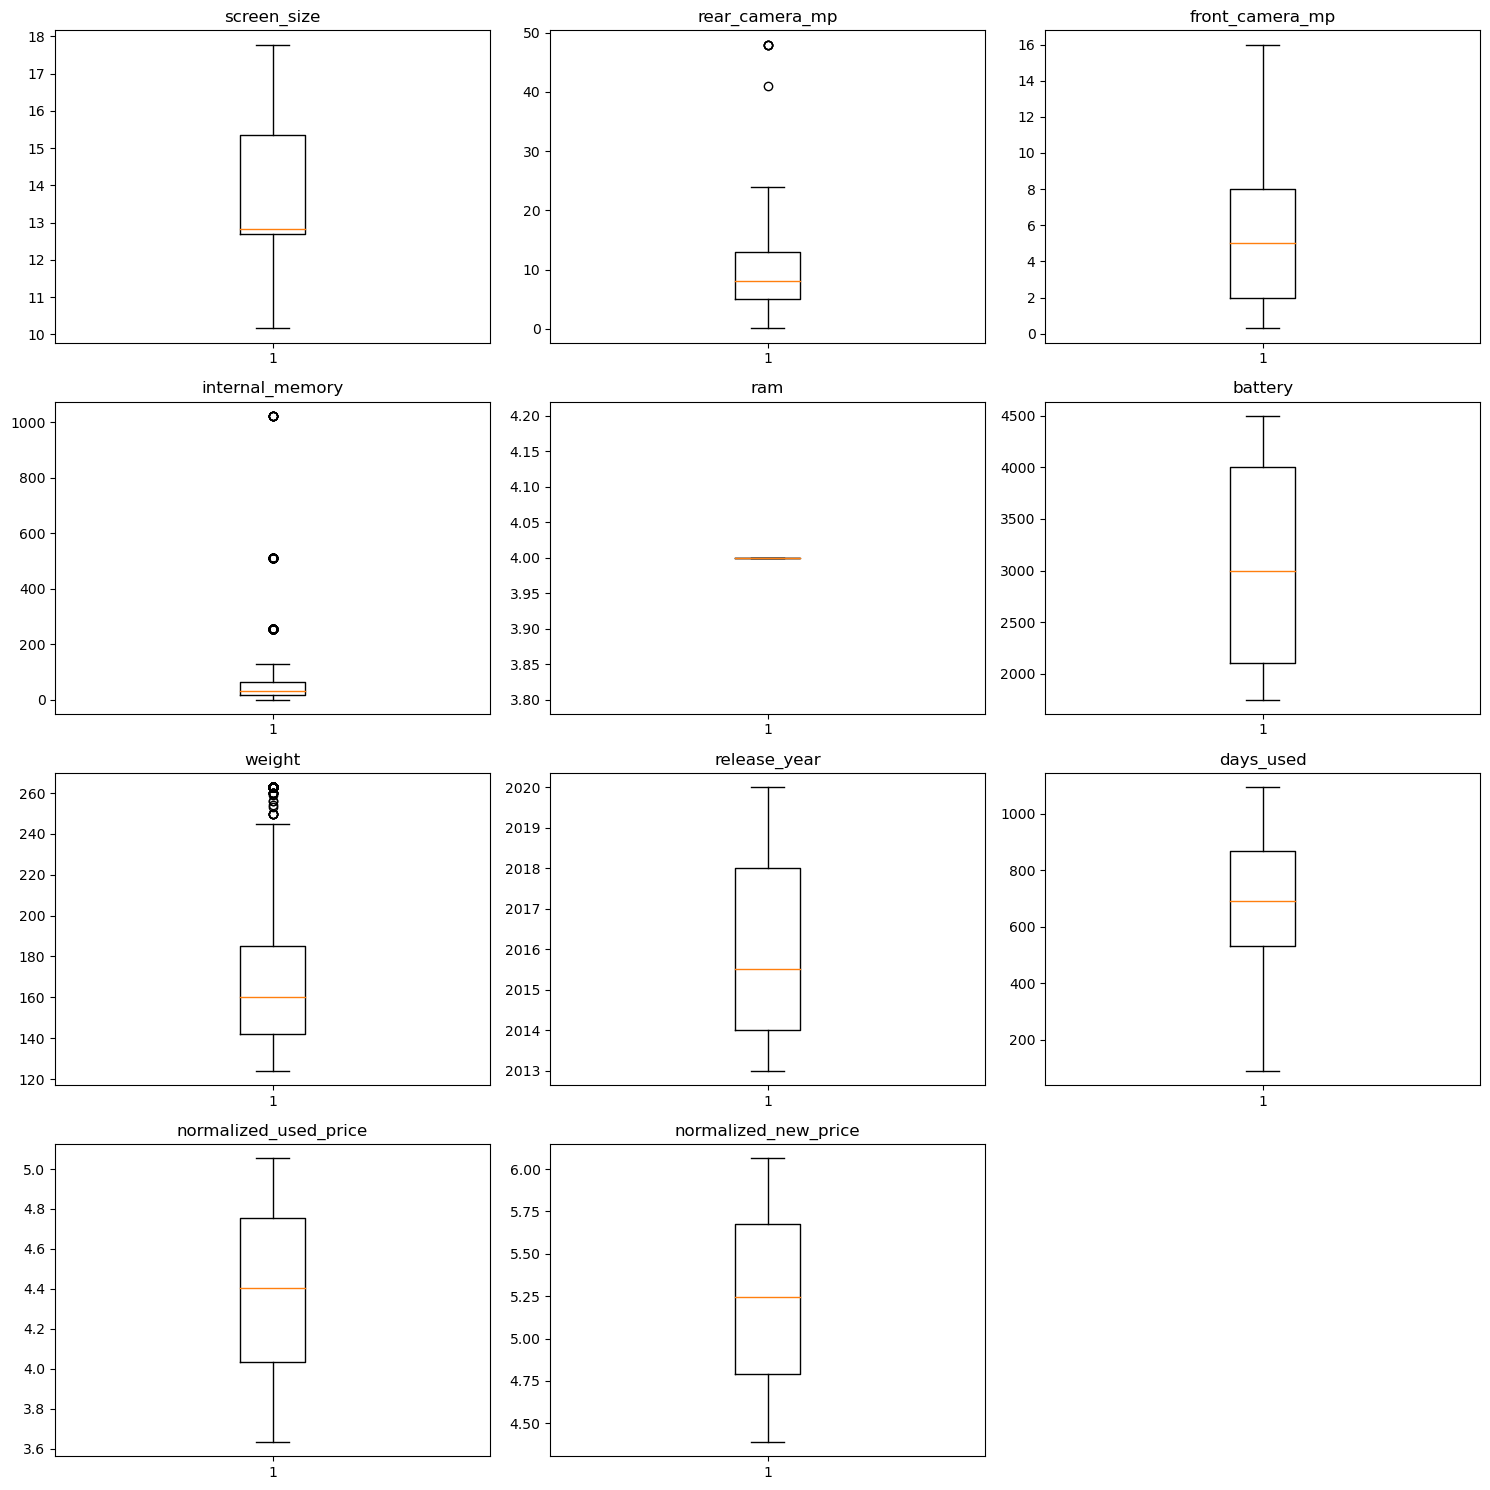

In [302]:
fig,axs= plt.subplots(4,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(num_features):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

Treating rear_camera_mp, internal_memory and battery separately

In [303]:
upper= df.rear_camera_mp.quantile(0.95)
df.rear_camera_mp= np.where(df.rear_camera_mp>upper,upper,df.rear_camera_mp)

upper= df.internal_memory.quantile(0.9)
df.internal_memory= np.where(df.internal_memory>upper,upper,df.internal_memory)

upper= df.weight.quantile(0.8)
df.weight= np.where(df.weight>upper,upper,df.weight)

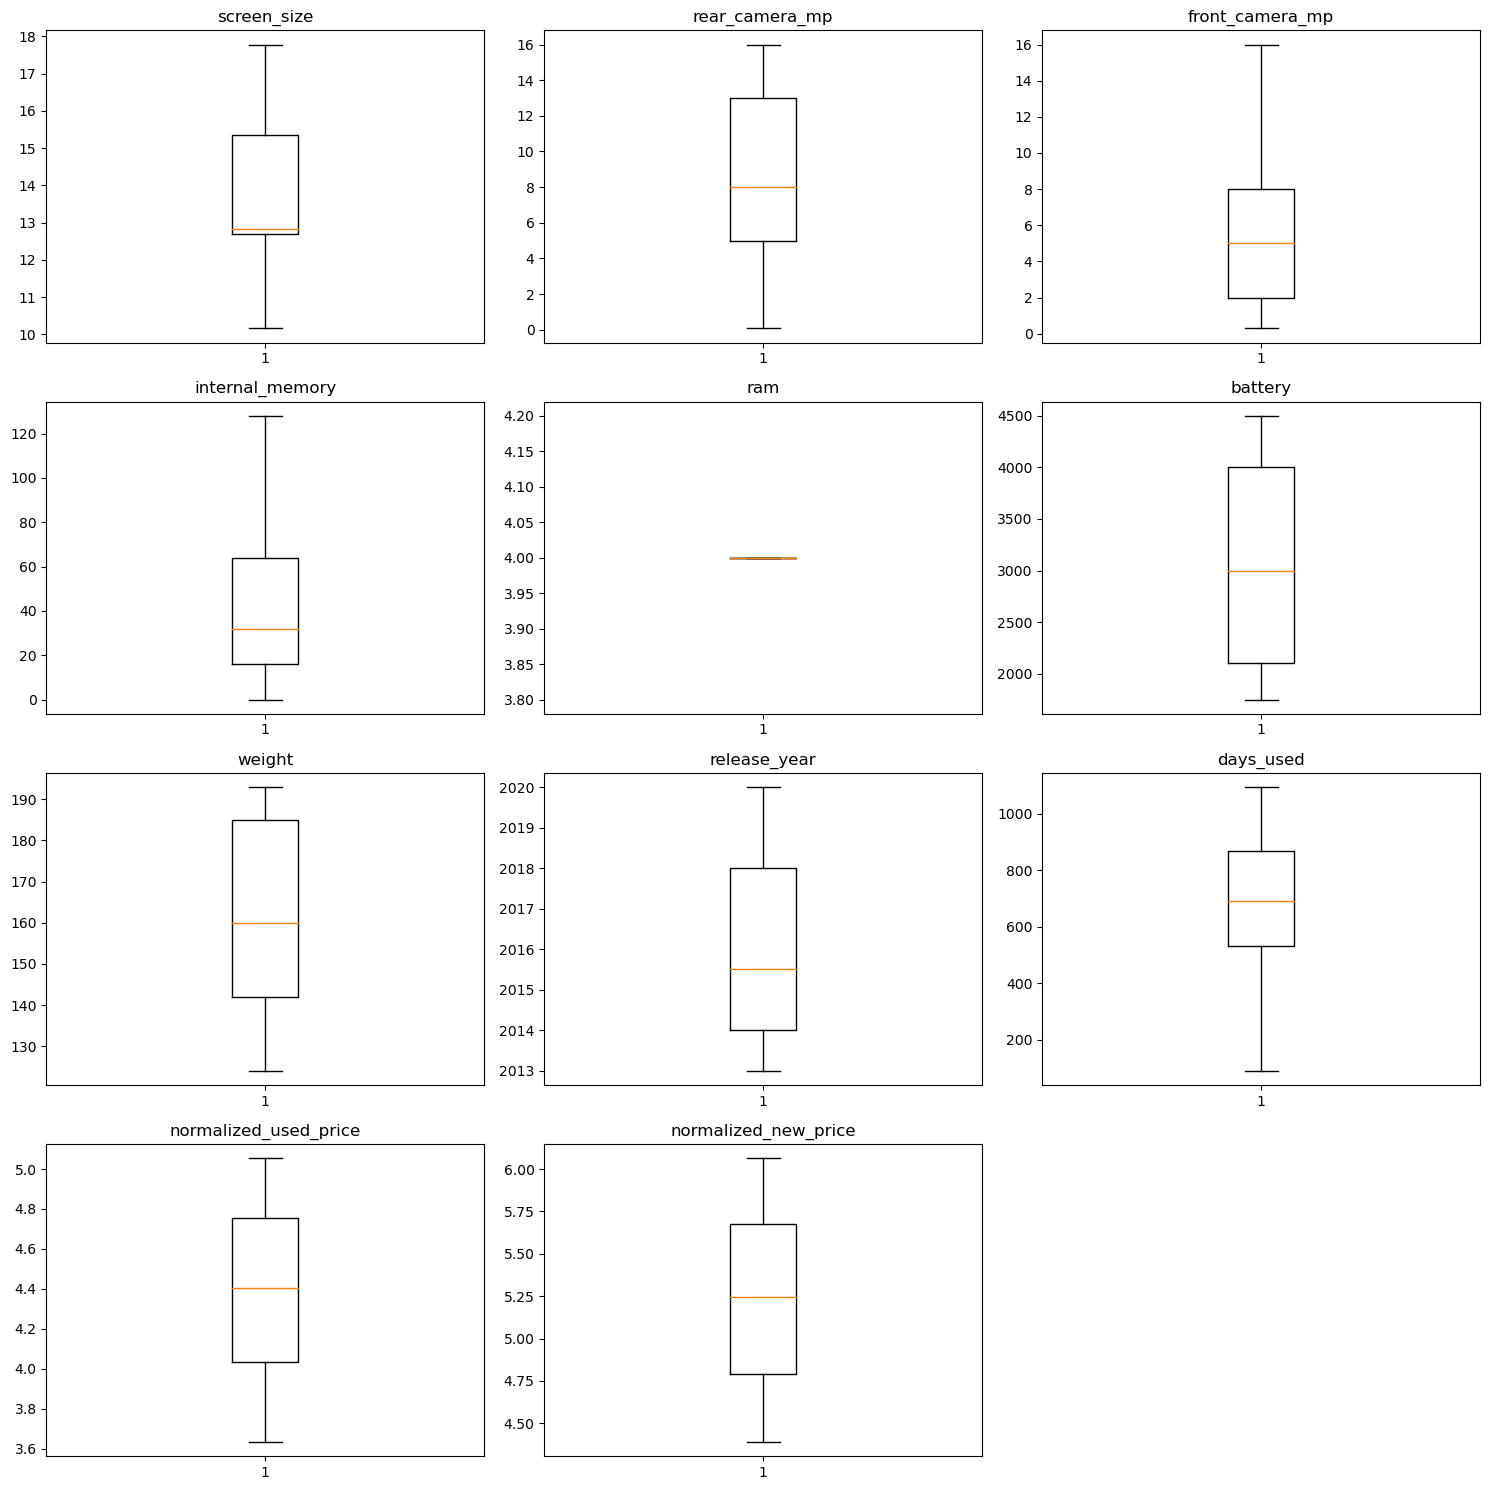

In [304]:
fig,axs= plt.subplots(4,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(num_features):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

## Bivariate Analysis

Let us check out the relationship between numerical features with target feature --> normalized used price

In [305]:
bi_num=['screen_size',
 'rear_camera_mp',
 'front_camera_mp',
 'internal_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_new_price']


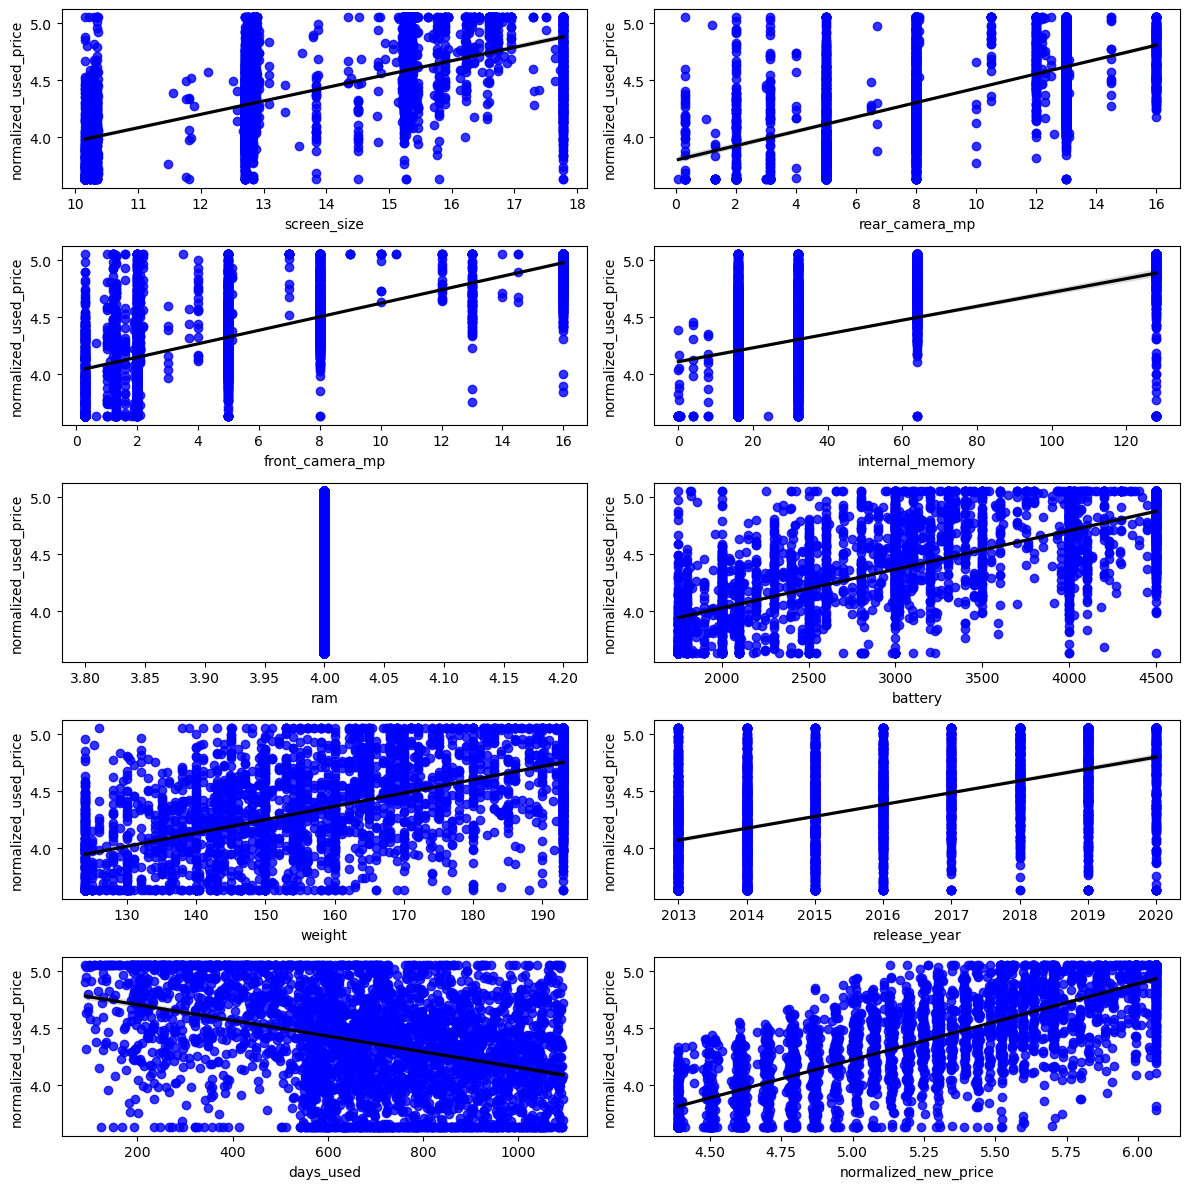

In [306]:
fig,axs= plt.subplots(5,2,figsize=(12,12))
axs=axs.ravel()
for i,ax in enumerate(axs):

    sns.regplot(x=bi_num[i],y='normalized_used_price',data=df,ax=ax,color='black',scatter_kws={"color":"blue"})

plt.tight_layout()
plt.show()


* Days used has **negative**/falling regression line 
* Ram has no line as it has most values on 4
* All other numerical features has rising/**positive** regression line

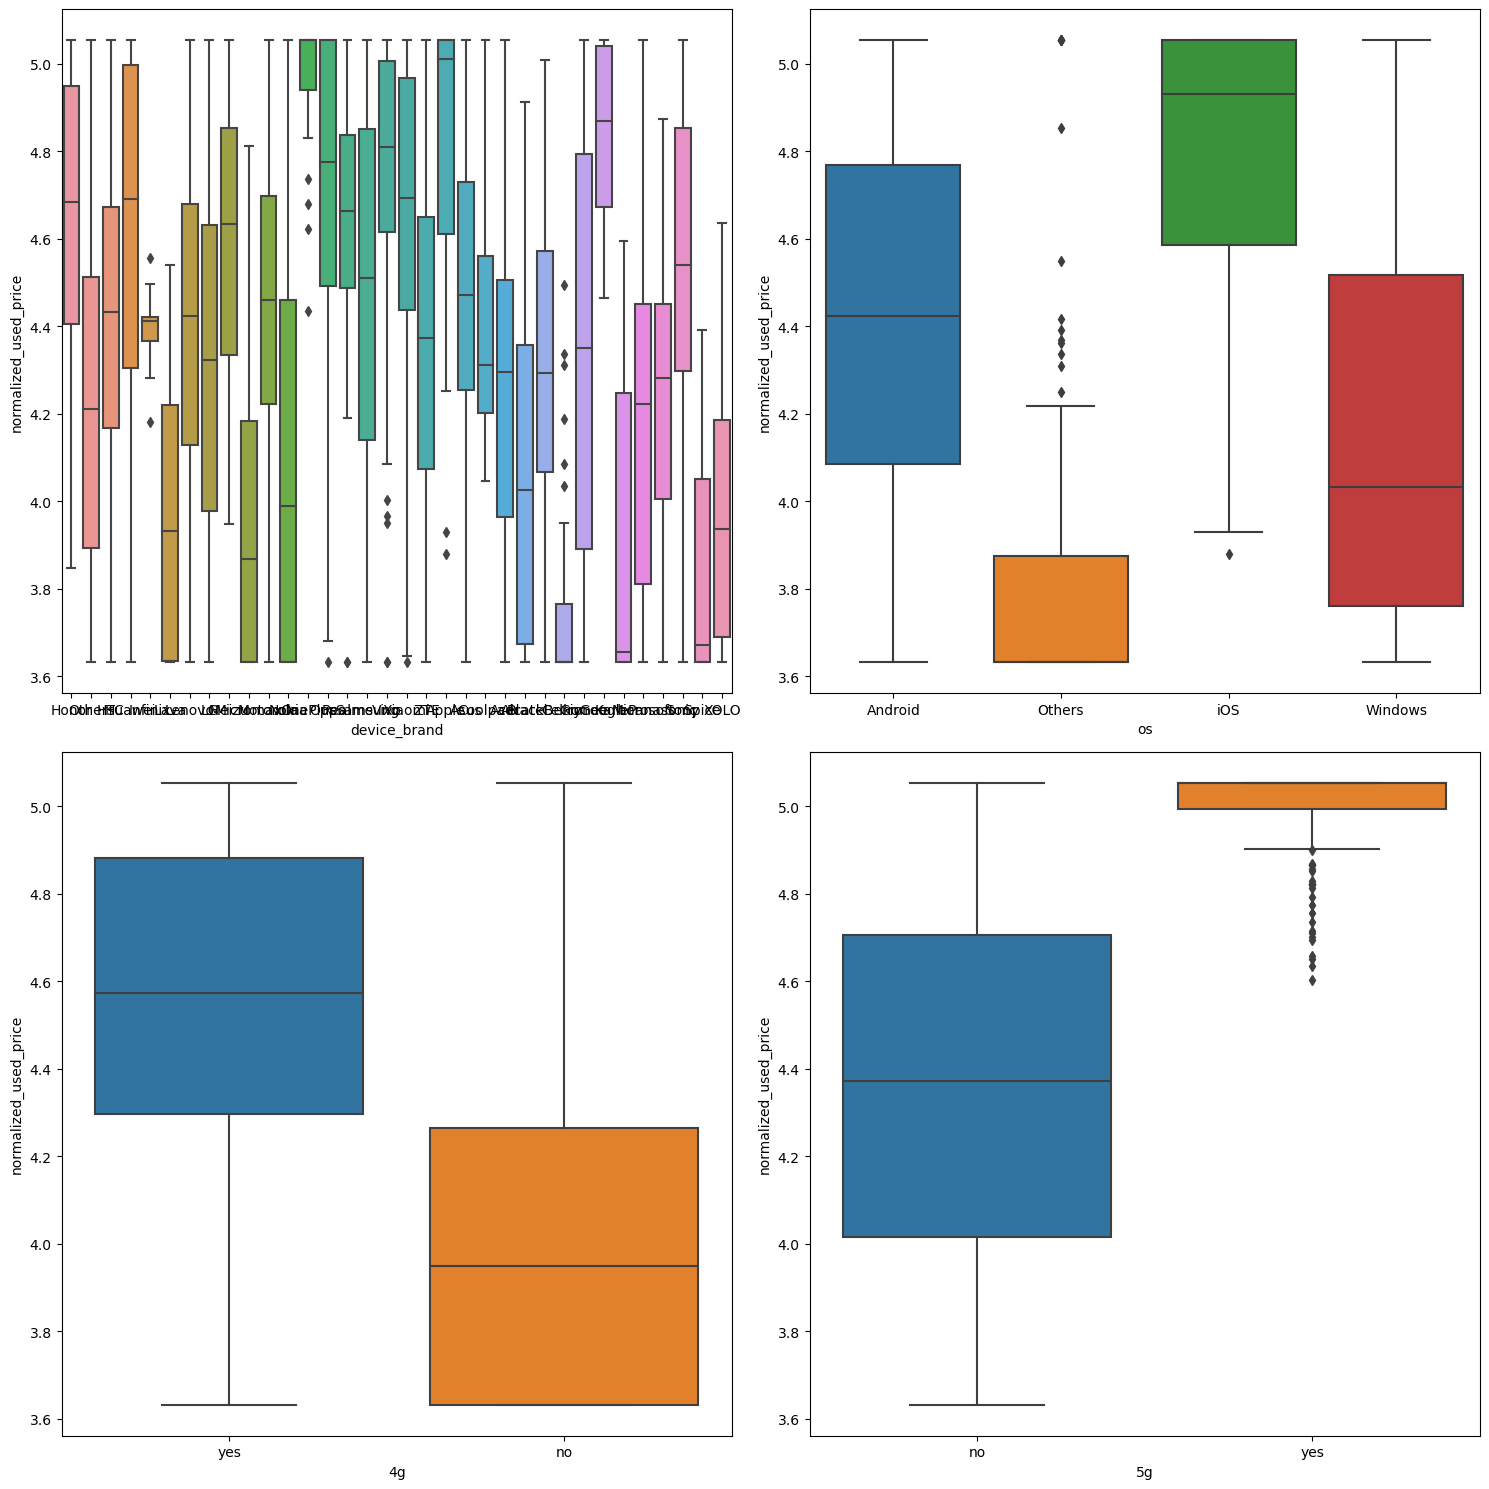

In [307]:
fig,axs= plt.subplots(2,2,figsize=(15,15))
axs=axs.ravel()
for i,ax in enumerate(axs):
    sns.boxplot(x=cat_features[i],y='normalized_used_price',data=df,ax=ax)

plt.tight_layout()
plt.show()

# Model Evluation

Lets try to fir our model

In [308]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,4.0,4300.0,193.0,2020,325,5.054027,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,4.0,4200.0,193.0,2020,162,5.054027,5.884631
3,Honor,Android,17.78,yes,yes,13.0,8.0,64.0,4.0,4500.0,193.0,2020,345,5.054027,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,4500.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,8.0,8.0,64.0,4.0,4500.0,190.0,2019,232,4.492337,6.063911
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,4.0,4000.0,193.0,2018,541,5.037732,6.063911
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,4.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,4.0,4000.0,160.0,2020,149,4.349762,4.624188


**One Hot Encoding**

In [309]:
df=pd.get_dummies(df,drop_first=True)

In [310]:
df

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127,4.307572,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4.0,4300.0,193.0,2020,325,5.054027,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4.0,4200.0,193.0,2020,162,5.054027,...,0,0,0,0,0,0,0,0,1,1
3,17.78,13.0,8.0,64.0,4.0,4500.0,193.0,2020,345,5.054027,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,4.0,4500.0,185.0,2020,293,4.389995,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,8.0,8.0,64.0,4.0,4500.0,190.0,2019,232,4.492337,...,0,0,0,0,0,0,0,0,1,0
3450,15.24,13.0,8.0,128.0,4.0,4000.0,193.0,2018,541,5.037732,...,0,0,0,0,0,0,0,0,1,0
3451,15.80,13.0,5.0,32.0,4.0,4000.0,165.0,2020,201,4.357350,...,0,0,0,0,0,0,0,0,1,0
3452,15.80,13.0,5.0,32.0,4.0,4000.0,160.0,2020,149,4.349762,...,0,0,0,0,0,0,0,0,1,0


In [311]:
x=df.drop("normalized_used_price",axis=1)
y=df['normalized_used_price']

In [312]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x_train.shape)
print(x_test.shape)

(2763, 48)
(691, 48)


In [313]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [314]:
#fitting model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import  statsmodels.api as sm 
model1=sm.OLS(y_train,sm.add_constant(x_train)).fit()

In [315]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.829
Model:                               OLS   Adj. R-squared:                  0.826
Method:                    Least Squares   F-statistic:                     280.3
Date:                   Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                           13:07:34   Log-Likelihood:                 727.60
No. Observations:                   2763   AIC:                            -1359.
Df Residuals:                       2715   BIC:                            -1075.
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3803      0.004   1227.419      0.000       4.373       4.387
x1             0.0965      0.007     13.614      0.000       0.083       0.110
x2             0.0873      0.006     15.796      0.000       0.076       0.098
x3             0.0830      0.007     11.776      0.000       0.069       0.097
x4             0.0346      0.006      6.277      0.000       0.024       0.045
x5         -2.453e-17   8.81e-18     -2.785      0.005   -4.18e-17   -7.26e-18
x6             0.0331      0.008      4.246      0.000       0.018       0.048
x7             0.0333      0.007      4.952      0.000       0.020       0.046
x8             0.0019      0.009      0.218      0.827      -0.015       0.019
x9             0.0098      0.006      1.728      0.084      -0.001       0.021
x10            0.1833      0.006     29.481      0.000       0.171       0.196
x11           -0.0031      0.007     -0.480      0.631      -0.016       0.010
x12            0.0299      0.020      1.480      0.139      -0.010       0.070
x13            0.0034      0.007      0.498      0.618      -0.010       0.017
x14            0.0007      0.004      0.165      0.869      -0.008       0.009
x15           -0.0028      0.005     -0.563      0.573      -0.012       0.007
x16            0.0008      0.004      0.196      0.845      -0.007       0.009
x17           -0.0038      0.005     -0.743      0.458      -0.014       0.006
x18            0.0072      0.004      1.723      0.085      -0.001       0.015
x19            0.0007      0.006      0.121      0.904      -0.011       0.013
x20           -0.0054      0.007     -0.815      0.415      -0.018       0.008
x21           -0.0062      0.008     -0.741      0.459      -0.023       0.010
x22            0.0004      0.004      0.112      0.911      -0.007       0.008
x23           -0.0001      0.005     -0.024      0.980      -0.009       0.009
x24           -0.0078      0.008     -0.980      0.327      -0.023       0.008
x25           -0.0029      0.005     -0.620      0.535      -0.012       0.006
x26           -0.0019      0.007     -0.259      0.796      -0.016       0.012
x27            0.0025      0.005      0.462      0.644      -0.008       0.013
x28            0.0008      0.006      0.116      0.907      -0.012       0.013
x29           -0.0007      0.005     -0.148      0.883      -0.010       0.009
x30           -0.0035      0.006     -0.543      0.587      -0.016       0.009
x31            0.0017      0.007      0.267      0.790      -0.011       0.015
x32           -0.0010      0.004     -0.235      0.814      -0.009       0.007
x33           -0.0018      0.007     -0.264      0.792      -0.015       0.012
x34           -0.0047      0.011     -0.429      0.668      -0.026       0.017
x35            0.0003      0.005      0.054     

In [316]:
x.columns

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_new_price', 'device_brand_Alcatel', 'device_brand_Apple',
       'device_brand_Asus', 'device_brand_BlackBerry', 'device_brand_Celkon',
       'device_brand_Coolpad', 'device_brand_Gionee', 'device_brand_Google',
       'device_brand_HTC', 'device_brand_Honor', 'device_brand_Huawei',
       'device_brand_Infinix', 'device_brand_Karbonn', 'device_brand_LG',
       'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Micromax', 'device_brand_Microsoft',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic',
       'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony',
       'device_brand_Spice', 'device_brand_Vivo', 'device_brand_XOLO',
       'device_brand_Xiaomi', 'device_brand_ZTE'

In [317]:
x.drop(['device_brand_Alcatel', 'device_brand_Apple',
       'device_brand_Asus', 'device_brand_BlackBerry', 'device_brand_Celkon',
       'device_brand_Coolpad', 'device_brand_Gionee', 'device_brand_Google',
       'device_brand_HTC', 'device_brand_Honor', 'device_brand_Huawei',
       'device_brand_Infinix', 'device_brand_Karbonn', 'device_brand_LG',
       'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Micromax', 'device_brand_Microsoft',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic',
       'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony',
       'device_brand_Spice', 'device_brand_Vivo', 'device_brand_XOLO',
       'device_brand_Xiaomi', 'device_brand_ZTE'],axis=1,inplace=True)

In [356]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2763, 14)
(691, 14)
(2763,)
(691,)


In [357]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [358]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.8272077725440048
0.8100957289936325


In [359]:
from sklearn import metrics
y_pred=lr.predict(x_test)

In [360]:
print("mae:",metrics.mean_absolute_error(y_test,y_pred))
print("mse: ",metrics.mean_squared_error(y_test,y_pred))
print("r2 score :",metrics.r2_score(y_test,y_pred))

mae: 0.15771356821235893
mse:  0.040159960193924156
r2 score : 0.8100957289936325


Text(0.5, 1.0, 'y_test vs y_pred')

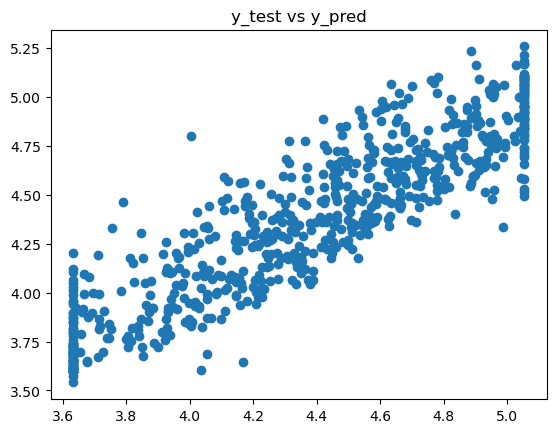

In [362]:
plt.scatter(y_test,y_pred)
plt.title("y_test vs y_pred")

Text(0.5, 1.0, 'error terms')

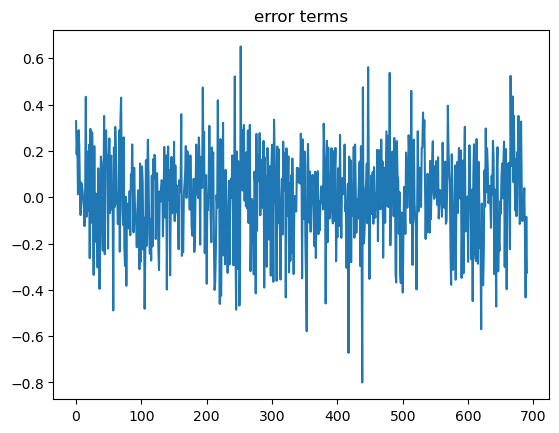

In [366]:
plt.plot(range(len(y_test)),y_test-y_pred)
plt.title("error terms")

<Axes: ylabel='Density'>

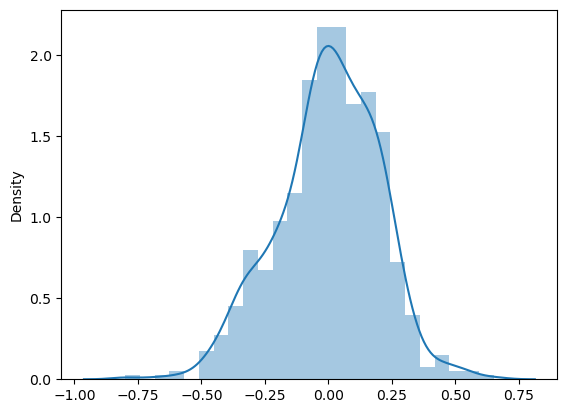

In [369]:
sns.distplot(x=y_test-y_pred)

# Ridge

In [399]:
ridge=Ridge()
ridge.fit(x_train,y_train)
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.8272077260106098
0.8101018812332322


In [400]:
y_pred_ridge=lr.predict(x_test)

In [401]:
print("mae:",metrics.mean_absolute_error(y_test,y_pred_ridge))
print("mse: ",metrics.mean_squared_error(y_test,y_pred_ridge))
print("r2 score :",metrics.r2_score(y_test,y_pred_ridge))

mae: 0.15771356821235893
mse:  0.040159960193924156
r2 score : 0.8100957289936325


# Lasso

In [402]:
lasso=Ridge()
lasso.fit(x_train,y_train)
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.8272077260106098
0.8101018812332322


In [403]:
y_pred_lasso=lr.predict(x_test)

In [404]:
print("mae:",metrics.mean_absolute_error(y_test,y_pred_lasso))
print("mse: ",metrics.mean_squared_error(y_test,y_pred_lasso))
print("r2 score :",metrics.r2_score(y_test,y_pred_lasso))

mae: 0.15771356821235893
mse:  0.040159960193924156
r2 score : 0.8100957289936325


In [406]:
rfe = RFE(lm)
       

# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(x_train,y_train)


# Printing the boolean results for each features

print(rfe.get_support())

# Printing the ranks for each features
print(rfe.ranking_)

[ True  True  True  True  True  True False False  True False False False
 False False]
[1 1 1 1 1 1 3 2 1 4 5 7 6 8]


In [412]:
lr2=LinearRegression()
cols=x_train.columns[rfe.support_]
lr2.fit(x_train[cols],y_train)

LinearRegression()

In [420]:
lr2.score(pd.DataFrame(x_test)[cols],y_test)

0.8083954835293443